In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [186]:
with open("../data/data.csv", "r") as f:
    df = pd.read_csv(f)
df.head()

,Level,Category,Variable,County,Date,GEOID,State FIPS,State,Value,Denominator,Denominator Description,Row-ID,Latitude,Longitude,Location,Year
0,County,Airports,Total Airports,"Grant County, Wisconsin",01/01/2020 12:00:00 AM,55043,55,Wisconsin,9.0,9.0,Total Airports,airports-2020-55043,42.867479,-90.706205,POINT (-90.706205 42.867479),2020
1,County,Airports,Total Airports,"Taylor County, Florida",01/01/2020 12:00:00 AM,12123,12,Florida,7.0,7.0,Total Airports,airports-2020-12123,30.047015,-83.603520,POINT (-83.60352 30.047015),2020
2,County,Airports,Total Airports,"Stephens County, Texas",01/01/2020 12:00:00 AM,48429,48,Texas,2.0,2.0,Total Airports,airports-2020-48429,32.735872,-98.836184,POINT (-98.836184 32.735872),2020
3,County,Airports,Other airports,"Knox County, Maine",01/01/2020 12:00:00 AM,23013,23,Maine,7.0,9.0,Total Airports,other-airports-2020-23013,44.155975,-69.234045,POINT (-69.234045 44.155975),2020
4,County,Airports,Primary Airports,"Colfax County, New Mexico",01/01/2020 12:00:00 AM,35007,35,New Mexico,0.0,5.0,Total Airports,primary-airports-2020-35007,36.606139,-104.646840,POINT (-104.64684 36.606139),2020


In [187]:
filtered_df = df[(df['Category'] == 'Person trips') & (df['Variable'] == 'Total trips')]
print(filtered_df)

         Level      Category     Variable                        County  \
338538  County  Person trips  Total trips        Adair County, Kentucky   
338541  County  Person trips  Total trips        Cass County, Minnesota   
338543  County  Person trips  Total trips        Dundy County, Nebraska   
338545  County  Person trips  Total trips          Menard County, Texas   
338547  County  Person trips  Total trips        Malheur County, Oregon   
...        ...           ...          ...                           ...   
407541  County  Person trips  Total trips  Judith Basin County, Montana   
407576  County  Person trips  Total trips       Massac County, Illinois   
407577  County  Person trips  Total trips     Orange County, California   
407589  County  Person trips  Total trips    Butte County, South Dakota   
407596  County  Person trips  Total trips         Caribou County, Idaho   

                          Date  GEOID  State FIPS         State         Value  \
338538  01/01/2019

In [188]:
aggregated_df = df.groupby('State')['Value'].sum().reset_index()
def abbreviate_states(states):
    state_dict = {
        'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR',
        'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL',
        'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
        'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
        'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
        'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
        'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
        'North Dakota': 'ND', 'Northern Mariana Islands': 'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
        'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI',
        'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
        'District of Columbia': 'DC'
    }
    abbreviated_states = [state_dict[state] if state in state_dict else state for state in states]

    return abbreviated_states

aggregated_df['State'] = abbreviate_states(aggregated_df['State'])

fig = px.choropleth(
    aggregated_df,
    locations='State',
    color_continuous_scale="Viridis",
    locationmode='USA-states',
    color='Value',
    scope='usa',
    title='Choropleth Map based on State Values of Travel Frequency'
)

fig.show()

In [189]:
filtered_df = filtered_df[filtered_df['State'].isin(["California", "Texas", "New York", "Florida", "Illinois"])]

In [190]:
values=filtered_df['Value']
endpts = list(np.mgrid[min(values):max(values):50j])
fig = ff.create_choropleth(fips=filtered_df['GEOID'], values=values, legend_title='Travel Frequency by County in the top 5 States with most Aggregated Trips')
fig.layout.template = None
fig.update_layout(
    legend_x = 0,
    annotations = {'x': -0.5, 'xanchor': 'left'}
)
fig.show()

In [ ]:
top_100_values_df = filtered_df.nlargest(100, 'Value')
df_with_top100_travel = df[df['GEOID'].isin(top_100_values_df['GEOID'])]
df_with_top100_travel = df_with_top100_travel[df_with_top100_travel['Category'].isin(['Business', 'Commuting'])]
df_with_top100_travel = df_with_top100_travel[(df_with_top100_travel['Variable'] == 'Establishments') | (df_with_top100_travel['Variable'] == "Commute by car/ truck/van")]

## Viz 5

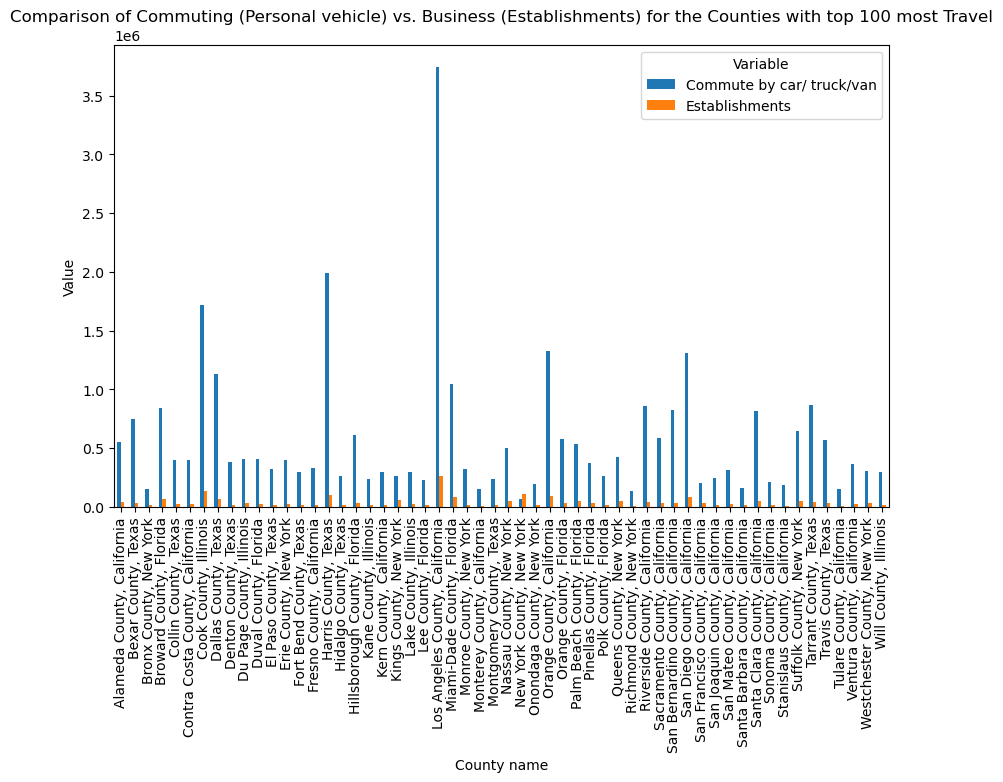

In [ ]:
pivoted_df = df_with_top100_travel.pivot_table(index='County', columns='Variable', values='Value', aggfunc='first')
pivoted_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('County name')
plt.ylabel('Value')
plt.title('Comparison of Commuting (Personal vehicle) vs. Business (Establishments) for the Counties with top 100 most Travel')
plt.show()

In [ ]:
top_100_values_df = filtered_df.nlargest(100, 'Value')
df_with_top100_travel = df[df['GEOID'].isin(top_100_values_df['GEOID'])]
df_with_top100_travel = df_with_top100_travel[df_with_top100_travel['Category'].isin(['Bridges', 'Commuting'])]
df_with_top100_travel = df_with_top100_travel[(df_with_top100_travel['Variable'] == "Bridge area, good (square meters)") | (df_with_top100_travel['Variable'] == "Commute by car/ truck/van")]

## Viz 6

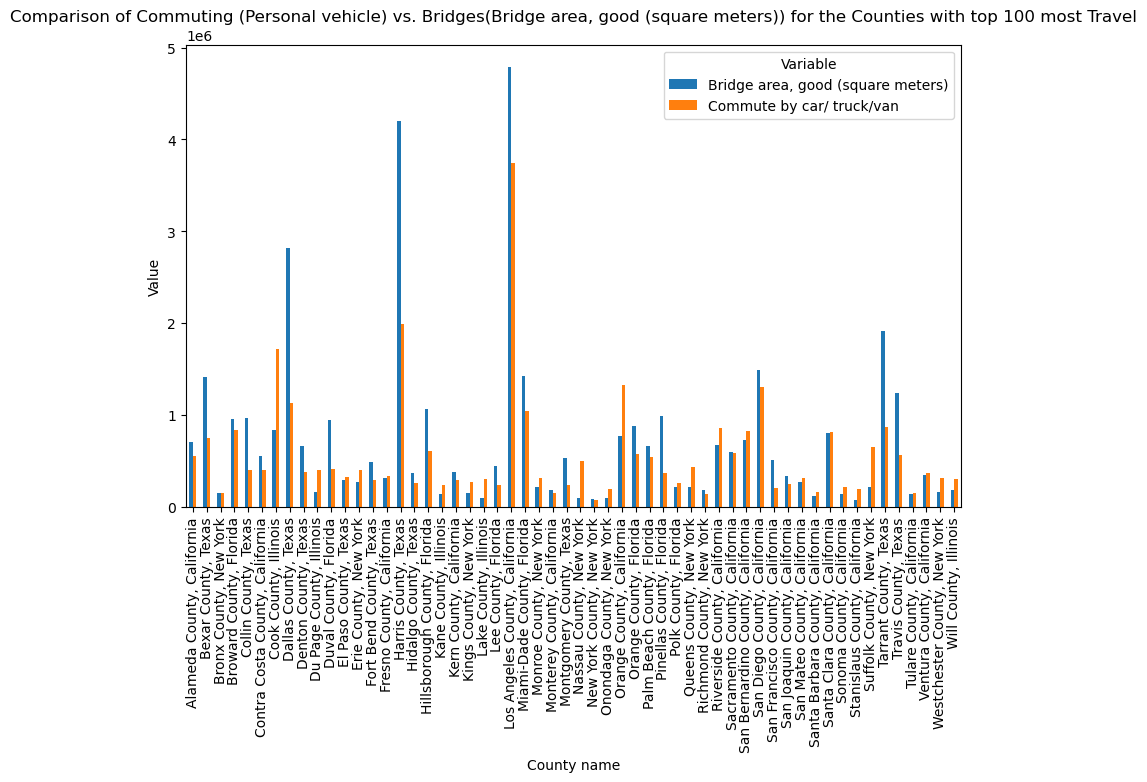

In [ ]:
pivoted_df = df_with_top100_travel.pivot_table(index='County', columns='Variable', values='Value', aggfunc='first')
pivoted_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('County name')
plt.ylabel('Value')
plt.title('Comparison of Commuting (Personal vehicle) vs. Bridges(Bridge area, good (square meters)) for the Counties with top 100 most Travel')
plt.show()

In [ ]:
income_vs_commute = df[(df['Category'] == "Demographics") | (df['Category'] == "Commuting")]
income_vs_commute = income_vs_commute[income_vs_commute['Variable'].isin(["Median Household Income", "Commute by car/ truck/van"])]
income_vs_commute = income_vs_commute[income_vs_commute['GEOID'].isin(top_100_values_df['GEOID'])]

## Viz 7

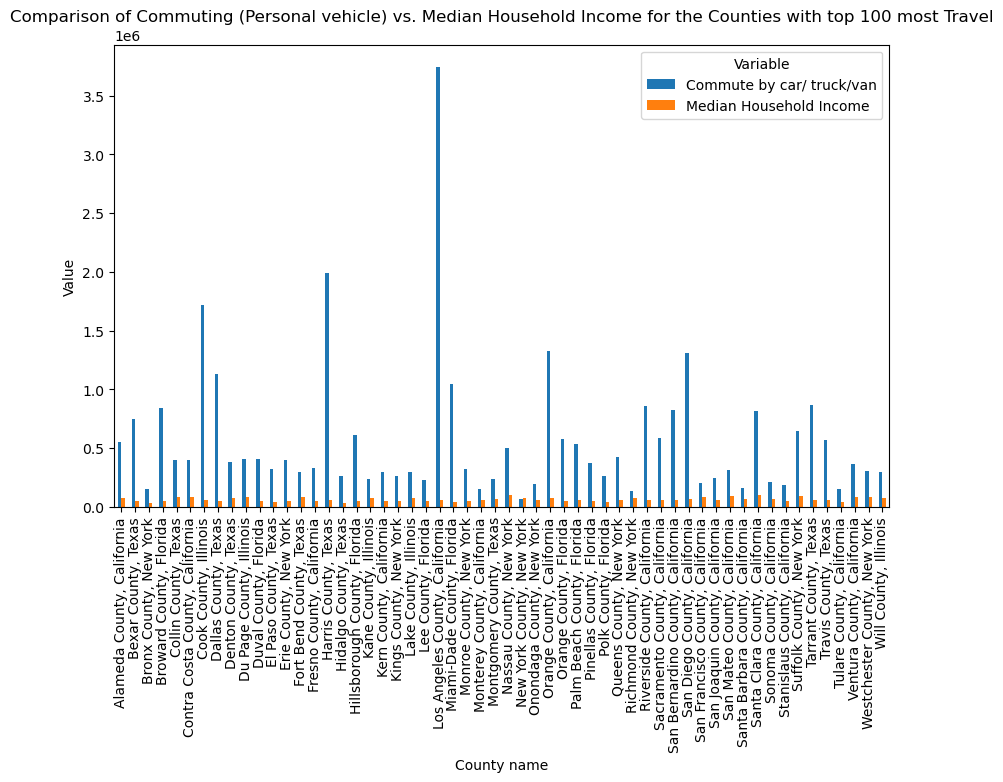

In [ ]:
pivoted_df = income_vs_commute.pivot_table(index='County', columns='Variable', values='Value', aggfunc='first')
pivoted_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('County name')
plt.ylabel('Value')
plt.title('Comparison of Commuting (Personal vehicle) vs. Median Household Income for the Counties with top 100 most Travel')
plt.show()

In [ ]:
top_50_values_df = filtered_df.nlargest(50, 'Value')
population_vs_commute = df[(df['Category'] == "Demographics") | (df['Category'] == "Commuting")]
population_vs_commute = population_vs_commute[population_vs_commute['Variable'].isin(["Workers", "Commute by car/ truck/van", "Commute by public transportation", "Work at home","Population" ])]
population_vs_commute = population_vs_commute[population_vs_commute['GEOID'].isin(top_50_values_df['GEOID'])]

## Viz 8

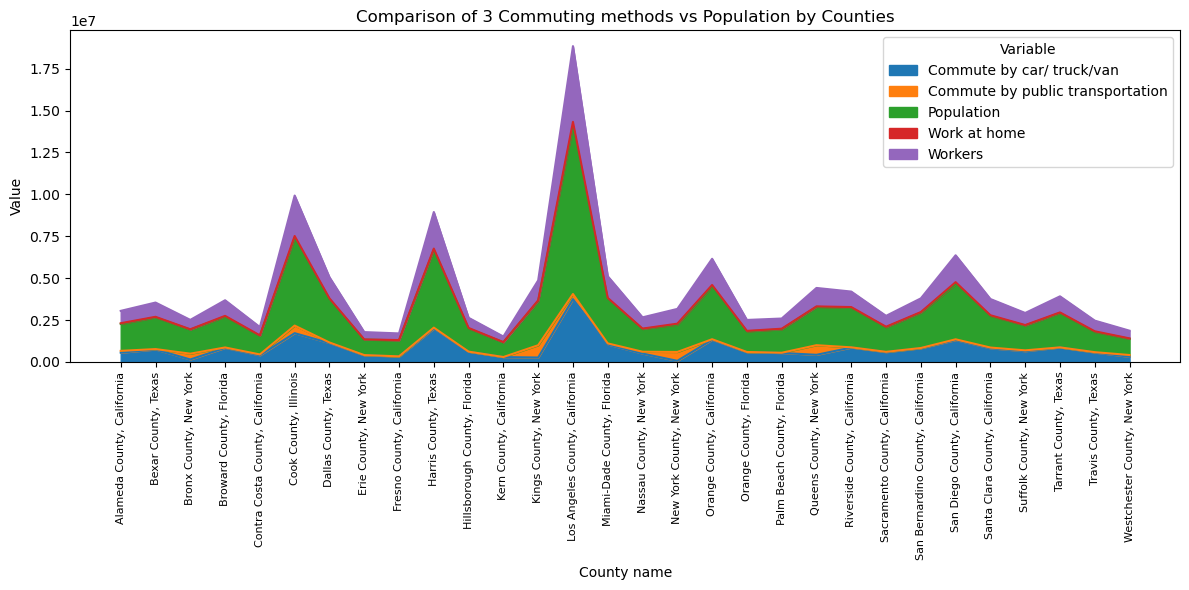

In [ ]:
pivoted_df = population_vs_commute.pivot_table(index='County', columns='Variable', values='Value', aggfunc='first')
ax = pivoted_df.plot(kind='area', figsize=(12, 6), stacked=True)
current_ticks = ax.get_xticks()
current_labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticks(range(len(pivoted_df.index)))  
ax.set_xticklabels(pivoted_df.index, rotation='vertical', fontsize=8) 

plt.xlabel('County name')
plt.ylabel('Value')
plt.title('Comparison of 3 Commuting methods vs Population by Counties')
plt.tight_layout()  
plt.show()